<a href="https://colab.research.google.com/github/yh0010/NYU_Summer_Tandon_Scholar_Intro2ML/blob/main/W2_ElainaH_2_advertising_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Linear regression on the Advertising data
=====================================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: N15610800
-   **Name**: Elaina(Yaogui) Huang

-------

The following content contains 2 parts. Part I is from the short-answer PDF questions, Part II is from the colab questions.


**Part I.**
===========

1. **Residuals**

False. Residuals can tell the systematic error if it is resulted from wrong implemented regression model. When the majority/all of the residuals are very small to 0, this means the model fits the data pattern, in this sense, the remaining large value residual could be due to the randomness/noises that no model would be able to learn from, or could be due to outlier/high leverage point.

2. **Regression metrics**

- 2.1 

(training R2 when N(0, σ2>=0)): 0 <= R2 <= 1 

When the epsilon is not zero, stochastic error will present in the data, the type of error that the model cannot learn from. In this case, the linear model will have residuals which cannot be fully explained by the model; however, the model will still be able to explain some data points, so the R2 value will not fall below 0, the worst performance is when the linear model is same as the mean. Since the epsilon could equal to 0, in this case, no stochastic error is generated, the R2 can equal to 1.

- 2.2 

(testing R2 when N(0, σ2>=0)): 0 <= R2 <= 1 

Because the test data is also generated through the same function as the training had, the test data should have similar pattern as the training data. Therefore, the R2 value should fall in the same range. Best case scenario is having the test data pattern similar to training data, but is the test data points have different pattern despite both dataset generated from same linear function, the linear model could still perform badly and the mean could be the best prediction for the test dataset.

- 2.3 

(training R2 when N(0, 0)): R2 = 1. 

Because there are none stochastic error, which meaning the least squares fitted linear regression will have 0 variance in terms of 


1.png

Therefore the MSE will be 0, thus R2 = 1.

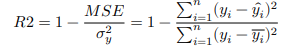

- 2.4 

(testing R2 when N(0, 0)): R2 = 1. 

Because the test data is also generated from the y = A + Bx when N(0, 0); therefore, the test data follows same pattern as the training data, and the linear model will fit just fine.

- 2.5 

(training R2 when N(0, 0)): R = 1. 

Same reason as described in 2.3. Because there are no stochastic error, no noises, the linear model should fit the linear function generated data very well.

- 2.6 

(testing R2 when N(0, 0)): R < 1. 

Because the testing data are sampled from a different linear function than the training data. If the test data linear function have very similar slop & intercept, the prediction result might be okay, but if the slope&intercept have great differences, then the model created from training dataset will not be useful to predict on test dataset, therefore the R will be negative.

3. **Linear Basis Function Regression**
- 3.a 

**Please see Apendix A 3.a, because the picture is too big, significantly slows down my colab, therefore I have to remove it from here.**


- 3.b

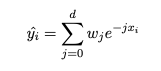

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# expect the pass-in array to be in feature-label pair as in: [x1,y1],[x2,y2], etc.
def DesignMatrix(arr, d):
  feature = np.array(arr[:,0]) # feature = [x1, x2, x3...]
  
  dimension = np.vstack(np.array([integer*-1 for integer in [*range(0,d+1,1)]])) # dimension = [0, -1, -2...]

  # y_hat = optimal_w * phi
  # phi = e^(-j*x)
  jx_exponent = feature * dimension
  constant_e = np.exp(1)

  X = np.array([(constant_e ** integer) for integer in jx_exponent]) #the phi
  X = np.hstack((np.ones(X.shape[0])[:,None], X))

  return X


x = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
d = 3
DesignMatrix(x, d)



array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.67879441e-01, 4.97870684e-02, 6.73794700e-03,
        9.11881966e-04, 1.23409804e-04, 1.67017008e-05],
       [1.00000000e+00, 1.35335283e-01, 2.47875218e-03, 4.53999298e-05,
        8.31528719e-07, 1.52299797e-08, 2.78946809e-10],
       [1.00000000e+00, 4.97870684e-02, 1.23409804e-04, 3.05902321e-07,
        7.58256043e-10, 1.87952882e-12, 4.65888615e-15]])

4. **Gradient Descent**
- 4.a.i & 4.a.ii & 4.a.iii

When learning rate is 0.0002, the estimated w is (4.29222615, 6.17249588)

3 coefficients appear to converge within 50 iterations. Though not all coefficients have reached the true value, it's getting very close.

**Plese see screenshot on Apendix A 4.1**

When learning rate is 0.002, the estimated w is (4.29222615, 6.17249588)

3 coefficients have converged to true value before finishing the 50 iterations.

**Plese see screenshot on Apendix A 4.2**

When learning rate is 0.02, the estimated w is (-360.77897346,  334.83484636)

3 coefficients overshoot the true value, when the 50 iteration is done, none of the coefficients is near the true value.

**Plese see screenshot on Apendix A 4.3**

- 4.b.i & 4.b.ii

Lr = 0.1, n=1

Very bumpy, only one of the coefficients is coverged. No visual on green's true value line, blue is very bumpy and very difficult to show if it is converging or diverging.

**Plese see screenshot on Apendix A 4.4**

Lr = 0.01, n=10

Only one of the coefficients is coverged. No visual on green's true value line, howeve, the blue line seems to gradually but slowly converging.

**Plese see screenshot on Apendix A 4.5**

Lr = 0.001, n=100

Lines are smoothier. Only red line is coverged, green's true value line is not visible, and blue line seems to converging in a very slow pace.

**Plese see screenshot on Apendix A 4.6**

**Part II.**
============

To illustrate principles of linear regression, we are going to use some
data from the textbook “An Introduction to Statistical Learning
withApplications in R” (Gareth James, Daniela Witten, Trevor Hastie,
Robert Tibshirani) (available via NYU Library).

The dataset is described as follows:

> Suppose that we are statistical consultants hired by a client to
> provide advice on how to improve sales of a particular product. The
> `Advertising` data set consists of the sales of that product in 200
> different markets, along with advertising budgets for the product in
> each of those markets for three different media: TV, radio, and
> newspaper.
>
> …
>
> It is not possible for our client to directly increase sales of the
> product. On the other hand, they can control the advertising
> expenditure in each of the three media. Therefore, if we determine
> that there is an association between advertising and sales, then we
> can instruct our client to adjust advertising budgets, thereby
> indirectly increasing sales. In other words, our goal is to develop an
> accurate model that can be used to predict sales on the basis of the
> three media budgets.

Sales are reported in thousands of units, and TV, radio, and newspaper
budgets, are reported in thousands of dollars.

For this assignment, you will fit a linear regression model to a small
dataset. You will iteratively improve your linear regression model by
examining the residuals at each stage, in order to identify problems
with the model.

Make sure to include your name and net ID in a text cell at the top of
the notebook.

### 1. Read in and pre-process data

In this section, you will read in the “Advertising” data, and make sure
it is loaded correctly. Visually inspect the data using a pairplot, and
note any meaningful observations. In particular, comment on which
features appear to be correlated with product sales, and which features
appear to be correlated with one another. Then, split the data into
training data (70%) and test data (30%).

**The code in this section is provided for you**. However, you should
add a text cell at the end of this section, in which you write your
comments and observations.

#### Read in data

In [ ]:
url = 'https://www.statlearning.com/s/Advertising.csv'
df  = pd.read_csv(url, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Note that in this dataset, the first column in the data file is the row
label; that’s why we use `index_col=0` in the `read_csv` command. If we
would omit that argument, then we would have an additional (unnamed)
column in the dataset, containing the row number.

(You can try removing the `index_col` argument and re-running the cell
above, to see the effect and to understand why we used this argument.)

#### Visually inspect the data

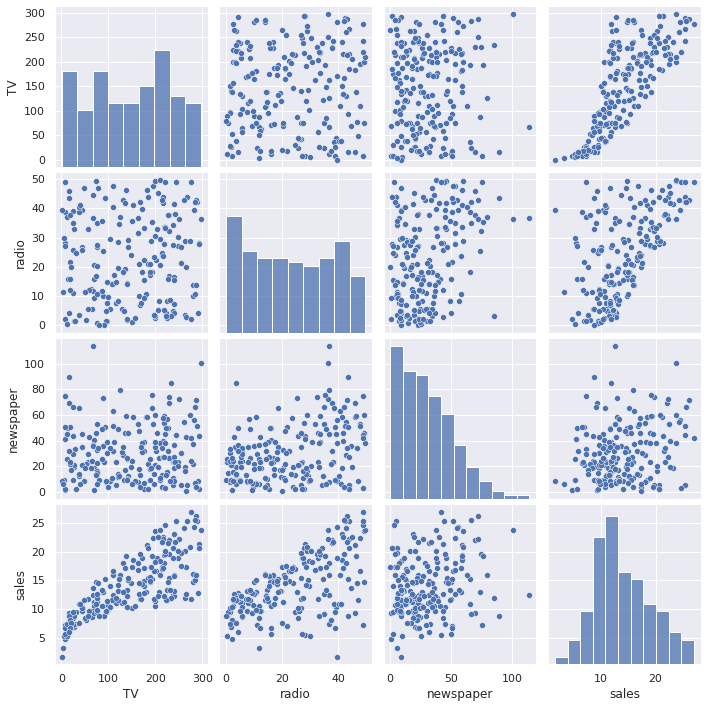

In [ ]:
sns.pairplot(df);

The most important panels here are on the bottom row, where `sales` is
on the vertical axis and the advertising budgets are on the horizontal
axes.

**Observations:**

- When the sales around 15 thousands dollars, the newspaper appear to have the best saling performance, as the sale increase, the newspaper does not appear to increase as much as when it had the sales around 15 thousands dollars. 
- The radio is mostly balanced, based on the plot of radio-radio, we can clearly see the second peak is when radio reach around 40 units.
- The TV has several high-leverage sales and the third peak of TV sales in when TV has around 210 units, after that the sales decrease.
- Based on the sale barplot, the highest sale appear to be among teens. 



#### Split up data

We will use 70% of the data for training and the remaining 30% to test
the regression model.

In [ ]:
train, test = train_test_split(df, test_size=0.3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 164 to 162
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   radio      140 non-null    float64
 2   newspaper  140 non-null    float64
 3   sales      140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 144
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
 3   sales      60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


### 2. Fit simple linear regression models

Use the training data to fit a simple linear regression to predict
product sales, for each of three features: TV ad budget, radio ad
budget, and newspaper ad budget. In other words, you will fit *three*
regression models, with each model being trained on one feature. For
each of the three regression models, create a plot of the training data
and the regression line, with product sales ($y$) on the vertical axis
and the feature on which the model was trained ($x$) on the horizontal
axis.

Also, for each regression model, print the intercept and coefficients,
and compute the MSE and R2 on the training data, and MSE and R2 on the
test data.

Comment on the results. Which type of ads seems to have the greatest
association with increased product sales? Which regression model is most
effective at predicting product sales?

**The code in this section is provided for you**. However, you should
add text cells in which you write your comments, observations, and
answers to the questions.

#### Fit a simple linear regression

In [ ]:
reg_tv    = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news  = LinearRegression().fit(train[['newspaper']], train['sales'])

#### Look at coefficients

In [ ]:
print("TV       : ", reg_tv.coef_[0], reg_tv.intercept_)
print("Radio    : ", reg_radio.coef_[0], reg_radio.intercept_)
print("Newspaper: ", reg_news.coef_[0], reg_news.intercept_)

TV       :  0.05085152538516586 6.761979768274984
Radio    :  0.22106977167854847 8.85692448427784
Newspaper:  0.058407998519177204 12.307401668250707


#### Plot data and regression line

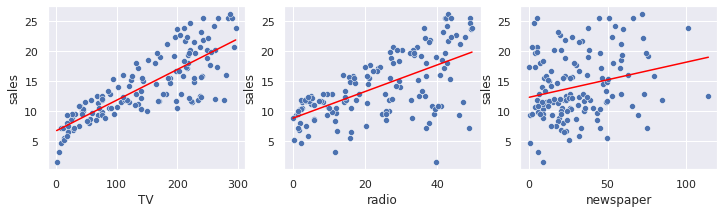

In [ ]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="TV", y="sales");
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="radio", y="sales");
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="newspaper", y="sales");
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

#### Compute R2, MSE for simple regression

**------- Section Break ---------**

In this section break, I created a model based on the dataset to see radio & sales with a train-test-split in 50-50 percent.

In [ ]:
train2, test2 = train_test_split(df, test_size=0.5)

In [ ]:
reg2_radio = LinearRegression().fit(train2[['radio']], train2['sales'])

In [ ]:
print("Radio  :", reg2_radio.coef_[0], reg2_radio.intercept_)

Radio  : 0.22153755157331312 9.075915355620499


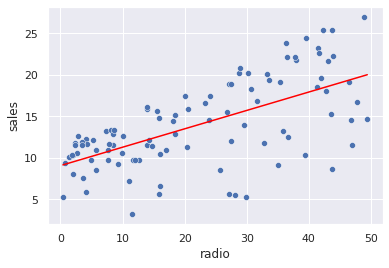

In [ ]:
sns.scatterplot(data=train2, x="radio", y="sales");
sns.lineplot(data=train2, x="radio", y=reg2_radio.predict(train2[['radio']]), color='red');

In [ ]:
y_pred_tr_radio2 = reg2_radio.predict(train2[['radio']])
r2_tr_radio2 = metrics.r2_score(train2['sales'], y_pred_tr_radio2)
print("Radio train R2   : ", r2_tr_radio2)
y_pred_ts_radio2 = reg2_radio.predict(test2[['radio']])
r2_ts_radio2 = metrics.r2_score(test2['sales'], y_pred_ts_radio2   )
print("Radio  test R2 : ", r2_ts_radio2)

mse_tr_radio2 = metrics.mean_squared_error(train2['sales'], y_pred_tr_radio2)
print("Radio train R2   : ", mse_tr_radio2)
mse_ts_radio2 = metrics.mean_squared_error(test2['sales'], y_pred_ts_radio2)
print("Radio  test R2 : ", mse_ts_radio2)

Radio train R2   :  0.39893668777269764
Radio  test R2 :  0.25415560474417354
Radio train R2   :  16.45287959881221
Radio  test R2 :  19.976883489475263


**------------ Section Break -----------**

In [ ]:
y_pred_tr_tv    = reg_tv.predict(train[['TV']])
y_pred_tr_radio = reg_radio.predict(train[['radio']])
y_pred_tr_news  = reg_news.predict(train[['newspaper']])

In [ ]:
r2_tr_tv    = metrics.r2_score(train['sales'], y_pred_tr_tv)
r2_tr_radio = metrics.r2_score(train['sales'], y_pred_tr_radio)
r2_tr_news  = metrics.r2_score(train['sales'], y_pred_tr_news)
print("TV       : ", r2_tr_tv)
print("Radio    : ", r2_tr_radio)
print("Newspaper: ", r2_tr_news)

TV       :  0.6522378148196777
Radio    :  0.37442648304599657
Newspaper:  0.05885294435215804


In [ ]:
mse_tr_tv    = metrics.mean_squared_error(train['sales'], y_pred_tr_tv)
mse_tr_radio = metrics.mean_squared_error(train['sales'], y_pred_tr_radio)
mse_tr_news  = metrics.mean_squared_error(train['sales'], y_pred_tr_news)
print("TV       : ", mse_tr_tv)
print("Radio    : ", mse_tr_radio)
print("Newspaper: ", mse_tr_news)

TV       :  10.113891514263884
Radio    :  18.19341766957391
Newspaper:  27.3711738234435


In [ ]:
y_pred_ts_tv    = reg_tv.predict(test[['TV']])
y_pred_ts_radio = reg_radio.predict(test[['radio']])
y_pred_ts_news  = reg_news.predict(test[['newspaper']])

In [ ]:
r2_ts_tv    = metrics.r2_score(test['sales'], y_pred_ts_tv)
r2_ts_radio = metrics.r2_score(test['sales'], y_pred_ts_radio)
r2_ts_news  = metrics.r2_score(test['sales'], y_pred_ts_news)
print("TV       : ", r2_ts_tv)
print("Radio    : ", r2_ts_radio)
print("Newspaper: ", r2_ts_news)

TV       :  0.4697291885038396
Radio    :  0.19083408149823566
Newspaper:  0.02814820934194595


In [ ]:
mse_ts_tv    = metrics.mean_squared_error(test['sales'], y_pred_ts_tv)
mse_ts_radio = metrics.mean_squared_error(test['sales'], y_pred_ts_radio)
mse_ts_news  = metrics.mean_squared_error(test['sales'], y_pred_ts_news)
print("TV       : ", mse_ts_tv)
print("Radio    : ", mse_ts_radio)
print("Newspaper: ", mse_ts_news)

TV       :  11.868427032540572
Radio    :  18.110607736187642
Newspaper:  21.75181400485689


In [ ]:
# To better visualize the scores, here I generate a table to compare
data = {
    'R2':[r2_tr_tv, r2_tr_radio, r2_tr_news, r2_ts_tv, r2_ts_radio, r2_ts_news ], 
    'MSE':[mse_tr_tv, mse_tr_radio, mse_tr_news, mse_ts_tv, mse_ts_radio, mse_ts_news]
}

dff = pd.DataFrame(data, index = ['tv_training', 'radio_training', 'news_training', 'tv_test', 'radio_test', 'news_test'])

dff

,R2,MSE
tv_training,0.652238,10.113892
radio_training,0.374426,18.193418
news_training,0.058853,27.371174
tv_test,0.469729,11.868427
radio_test,0.190834,18.110608
news_test,0.028148,21.751814


**Observations:**

Overall, they do not look very optimally fitted with the simple linear regression, except for the tv & sales model. However, even the tv & sales model do not have a very good fitted linear regression model. The R2 explains about 64.5% of the data points in the training set with MSE about 10.5, but only explains about 50.7% of the datapoints in the testing set with a similar MSE about 10.7. This could tells us there is a linear relationship between the two vairables, in fact it is a strong positive relationship(sqrt of 0.644533 is 0.8028281261 which is the R).

Very interesting to see that on the radio & sales model, the R2 is higher on testing set(around 0.433) than on the training set(about 0.300). I search online and found 1 explaination that this could be due to the train-test-split percetage. Or it could be there are too many noises in the training set than in the testing set. I made a copy of this dataset, and splited the set into 50-50 for train and test, the new difference reduced from 13 to 4 in the R2 values. Along with the MSE differences reduced from 8.3 to 2.4).

As for the newspaper, this is likely to be the result of an underfitting model, to explain why both the train and test set have very low R2 scores(train: 0.058; test: 0.033), along with high MSE rates in both of the sets, meaning that the simple linear regression model is not the correct model to use for this set of data.

### 3. Explore the residuals for the single linear regression models

We know that computing MSE or R2 is not sufficient to diagnose a problem
with a linear regression.

Create some additional plots as described below to help you identify any
problems with the regression. Use training data for all of the items
below.

-   3.1 For each of the three regression models, plot predicted sales
    ($\hat{y}$) on the vertical axis, and actual sales ($y$) on the
    horizontal axis. Make sure both axes use the same scale. Comment on
    your observations. What would you expect this plot to look like for
    a model that explains the data well?
-   3.2 For each of the three regression models, compute the residuals
    ($y - \hat{y}$). Note that some of these will be negative, and some
    will be positive. What is the mean residual for each of the
    regression models? What *should* be the mean residual for a fitted
    linear regression model? Explain your answer.
-   3.3 For each of the three regression models, plot the residuals
    ($y - \hat{y}$) on the vertical axis, and actual sales ($y$) on the
    horizontal axis. Use the same scale for all three subplots. Comment
    on your observations. Is there a pattern in the residuals (and if
    so, what might it indicate), or do they appear to have no pattern
    with respect to actual sales?
-   3.4 For each of the three regression models AND each of the three
    features, plot the residuals ($y - \hat{y}$) on the vertical axis,
    and the feature ($x$) on the horizontal axis. This plot will include
    nine subplots in total. Make sure to clearly label each axis, and
    also label each subplot with a title that indicates which regression
    model it uses. Is there a pattern in the residuals (and if so, what
    might it indicate), or do they appear to have no pattern with
    respect to each of the three features?

**The code in this section is not provided for you**. You will need to
write code, in addition to the text cells in which you write your
comments, observations, and answers to the questions.

Text(0.5, 1.0, 'Predicted TV sales vs. Actual Sales')

Text(0.5, 0, 'actual sales')

Text(0, 0.5, 'predicted tv sales')

Text(0.5, 1.0, 'Predicted Radio sales vs. Actual Sales')

Text(0.5, 0, 'actual sales')

Text(0, 0.5, 'predicted radio sales')

Text(0.5, 1.0, 'Predicted Newspaper sales vs. Actual Sales')

Text(0.5, 0, 'actual sales')

Text(0, 0.5, 'predicted newspaper sales')

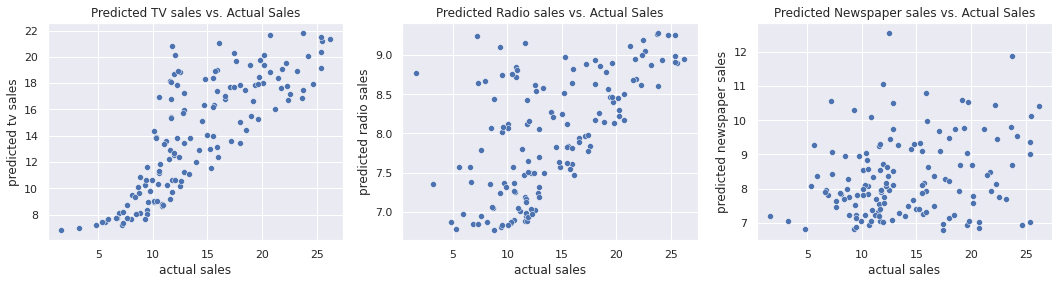

In [ ]:
# 3.1
fig = plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x=train['sales'], y=reg_tv.predict(train[['TV']]));
plt.title('Predicted TV sales vs. Actual Sales')
plt.xlabel('actual sales')
plt.ylabel('predicted tv sales')

plt.subplot(1,3,2)
sns.scatterplot(data=train, x=train['sales'], y=reg_tv.predict(train[['radio']]));
plt.title('Predicted Radio sales vs. Actual Sales')
plt.xlabel('actual sales')
plt.ylabel('predicted radio sales')

plt.subplot(1,3,3)
sns.scatterplot(data=train, x=train['sales'], y=reg_tv.predict(train[['newspaper']]));
plt.title('Predicted Newspaper sales vs. Actual Sales')
plt.xlabel('actual sales')
plt.ylabel('predicted newspaper sales')

plt.show()

#comments: What would you expect this plot to look like for a model that explains the data well?
# If the model predicts really well, we should be expecting a very clear diagonal line from (0,0) to (max(x_axis), max(y_axis))


In [ ]:
# 3.2
import statistics as sts
df3 = pd.DataFrame([])

y_train_hat_tv = reg_tv.predict(train[['TV']])
y_train_hat_radio = reg_radio.predict(train[['radio']])
y_train_hat_newspaper = reg_news.predict(train[['newspaper']])

df3['residual_train_tv'] = train['sales'] - y_train_hat_tv
df3['residual_train_radio'] = train['sales'] - y_train_hat_radio
df3['residual_train_newspaper'] = train['sales'] - y_train_hat_newspaper

print("mean of tv residual: ", sts.mean(df3['residual_train_tv']))
print("mean of radio residual: ", sts.mean(df3['residual_train_radio']))
print("mean of newspaper residual: ", sts.mean(df3['residual_train_newspaper']))

#comments: What is the mean residual for each of the regression models? # see print
# What should be the mean residual for a fitted linear regression model?
# the best scenario is that the mean of residual equals 0 or very close to 0, that means there are no residuals, and the model fits very well

mean of tv residual:  -6.217248937900876e-16
mean of radio residual:  -2.5376526277146434e-17
mean of newspaper residual:  1.0658141036401502e-15


Text(0.5, 1.0, 'TV Residuals vs. Actual Sales')

Text(0.5, 0, 'sales')

Text(0, 0.5, 'tv residuals')

Text(0.5, 1.0, 'Radio Residuals vs. Actual Sales')

Text(0.5, 0, 'sales')

Text(0, 0.5, 'radio residuals')

Text(0.5, 1.0, 'Newspaper Residuals vs. Actual Sales')

Text(0.5, 0, 'sales')

Text(0, 0.5, 'newspaper residuals')

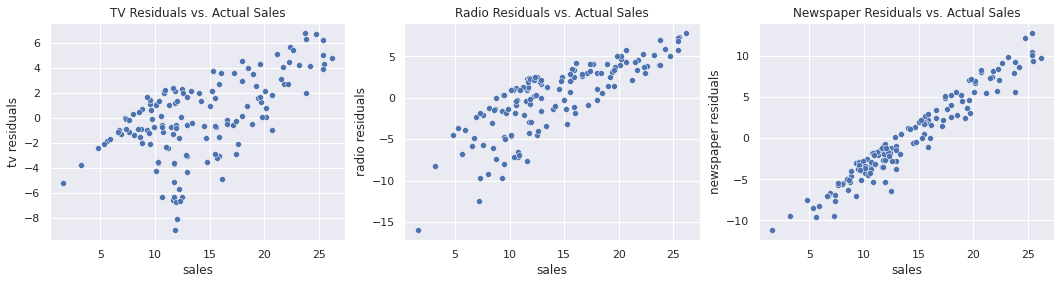

In [ ]:
# 3.3
fig = plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x=train['sales'], y=df3['residual_train_tv']);
plt.title('TV Residuals vs. Actual Sales')
plt.xlabel('sales')
plt.ylabel('tv residuals')

plt.subplot(1,3,2)
sns.scatterplot(data=train, x=train['sales'], y=df3['residual_train_radio']);
plt.title('Radio Residuals vs. Actual Sales')
plt.xlabel('sales')
plt.ylabel('radio residuals')

plt.subplot(1,3,3)
sns.scatterplot(data=train, x=train['sales'], y=df3['residual_train_newspaper']);
plt.title('Newspaper Residuals vs. Actual Sales')
plt.xlabel('sales')
plt.ylabel('newspaper residuals')

plt.show()

#comments: Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to actual sales?
# the tv residuals show a weird upside-down v-shape pattern that do not look like linear
# the other twos look like linear, especially the newspaper ones

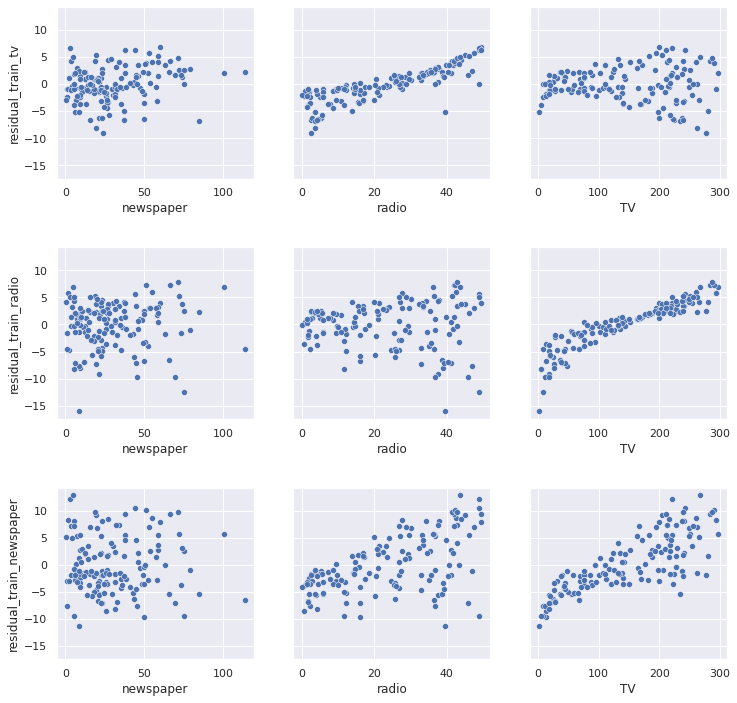

In [ ]:
# 3.4

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12), sharey=True)
plt.subplots_adjust(hspace=.4)

sns.scatterplot(data=train, x=train['TV'], y=df3['residual_train_tv'], ax=axs[0,2]);

sns.scatterplot(data=train, x=train['TV'], y=df3['residual_train_radio'], ax=axs[1,2]);

sns.scatterplot(data=train, x=train['TV'], y=df3['residual_train_newspaper'], ax=axs[2,2]);

sns.scatterplot(data=train, x=train['radio'], y=df3['residual_train_tv'], ax=axs[0,1]);

sns.scatterplot(data=train, x=train['radio'], y=df3['residual_train_radio'], ax=axs[1,1]);

sns.scatterplot(data=train, x=train['radio'], y=df3['residual_train_newspaper'], ax=axs[2,1]);

sns.scatterplot(data=train, x=train['newspaper'], y=df3['residual_train_tv'], ax=axs[0,0]);

sns.scatterplot(data=train, x=train['newspaper'], y=df3['residual_train_radio'], ax=axs[1,0]);

sns.scatterplot(data=train, x=train['newspaper'], y=df3['residual_train_newspaper'], ax=axs[2,0]);

plt.show()


#comment : what would you expect this plot to look like for a model that explains the data well?
# I think this should be telling that, the regression residuals on tv compare to the units in newspaper, show a pattern that in the lower units of newspaper
# residuals appear to be more clustered than in the higher units of newspaper, this means that, based on this linear model,
# spendings in the lower units of tv do not perform as good as in newspaper, therefore lower spending should be directed on newspaper instead of tv
# lower right corner shows x-axis on tv, clearly showing a pattern as tv in higher units perform better
# similar interpretations could apply to the other charts, as the cahrt tells the performance of 1 variable in lower or higher or middle units whether it outperforms
# or underperforms the ther variable, therefore, the spedning could be directed more wisely

# as for the self-self comparison, it's showing the residuals pattern from the regression model, to indicate whether the model
# is fitted or not at all
# for instance, the residuals in both tv and radio, appear to have a more fit-to-the-mean type of pattern rather than diagonal linear pattern

### 4. Try a multiple linear regression

Next, fit a multiple linear regression to predict product sales, using
all three features to train a single model: TV ad budget, radio ad
budget, and newspaper ad budget.

Print the intercept and coefficients, and compute the MSE and R2 on the
training data, and MSE and R2 on the test data. Comment on the results.
Make sure to explain any differences between the coefficients of the
multiple regression model, and the coefficients of the three simple
linear regression models. If they are different, why?

**The code in the first part of this section is provided for you**.
However, you should add text cells in which you write your comments,
observations, and answers to the questions.

Also repeat the analysis of part (3) for this regression model. Use
training data for all of these items:

-   4.1 Plot predicted sales ($\hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Make sure both axes use the same
    scale. Comment on your observations. What would you expect this plot
    to look like for a model that explains the data well?
-   4.2 Compute the residuals ($y - \hat{y}$). What is the mean of the
    residuals? What *should* be the mean of the residuals for a fitted
    linear regression model? Explain your answer.
-   4.3 Plot the residuals ($y - \hat{y}$) on the vertical axis, and actual
    sales ($y$) on the horizontal axis. Comment on your observations. Is
    there a pattern in the residuals (and if so, what might it
    indicate), or do they appear to have no pattern with respect to
    actual sales?
-   4.4 For each of the three features, plot the residuals ($y - \hat{y}$)
    on the vertical axis, and the feature ($x$) on the horizontal axis.
    Make sure to clearly label each axis. Is there a pattern in the
    residuals (and if so, what might it indicate), or do they appear to
    have no pattern with respect to each of the three features?

**The code in the last part of this section is not provided for you**.
You will need to write code, in addition to the text cells in which you
write your comments, observations, and answers to the questions.

#### Fit a multiple linear regression

In [ ]:
reg_multi = LinearRegression().fit(train[['TV', 'radio', 'newspaper']], train['sales'])

#### Look at coefficients

In [ ]:
print("Coefficients (TV, radio, newspaper):", reg_multi.coef_)
print("Intercept: ", reg_multi.intercept_)

Coefficients (TV, radio, newspaper): [ 0.04639829  0.18463569 -0.00197086]
Intercept:  3.0876365337235594


#### Compute R2, MSE for multiple regression

In [ ]:
y_pred_tr_multi = reg_multi.predict(train[['TV', 'radio', 'newspaper']])

r2_tr_multi  = metrics.r2_score(train['sales'], y_pred_tr_multi)
mse_tr_multi = metrics.mean_squared_error(train['sales'], y_pred_tr_multi)

print("Multiple regression R2:  ", r2_tr_multi)
print("Multiple regression MSE: ", mse_tr_multi)


Multiple regression R2:   0.9058513715657083
Multiple regression MSE:  2.7381039537332836


In [ ]:
y_pred_ts_multi = reg_multi.predict(test[['TV', 'radio', 'newspaper']])

r2_ts_multi  = metrics.r2_score(test['sales'], y_pred_ts_multi)
mse_ts_multi = metrics.mean_squared_error(test['sales'], y_pred_ts_multi)

print("Multiple regression R2:  ", r2_ts_multi)
print("Multiple regression MSE: ", mse_ts_multi)


Multiple regression R2:   0.8675149348721862
Multiple regression MSE:  2.96525717479026


Text(0.5, 1.0, 'Predicted sales vs. Actual Sales')

Text(0.5, 0, 'actual values')

Text(0, 0.5, 'predicted values')

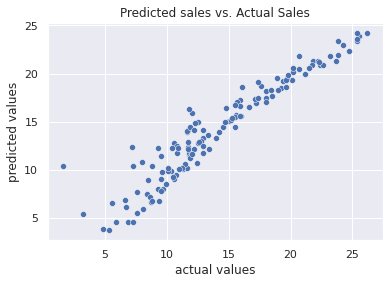

In [ ]:
# 4.1

sns.scatterplot(data=train, x=train['sales'], y=y_pred_tr_multi)
plt.title('Predicted sales vs. Actual Sales')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

#comments: What would you expect this plot to look like for a model that explains the data well?
# If the model predicts really well, we should be expecting a very clear diagonal line from (0,0) to (max(x_axis), max(y_axis))
# this model shows a linear relationship between the two variables

In [ ]:
# 4.2

multi_residual = train['sales'] - y_pred_tr_multi
print("mean of residual: ", sts.mean(multi_residual))

#comments:  What is the mean of the residuals? #see print
#What should be the mean of the residuals for a fitted linear regression model?
# the best scenario is that the mean of residual equals 0 or very close to 0, that means there are no residuals, and the model fits very well
# this residual shows the model is well fitted

mean of residual:  -1.8810350102934795e-15


Text(0.5, 1.0, 'Residuals vs. Sales')

Text(0.5, 0, 'sales')

Text(0, 0.5, 'residuals')

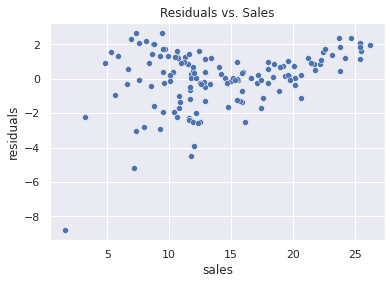

In [ ]:
# 4.3

sns.scatterplot(data=train, x=train['sales'], y=multi_residual)
plt.title('Residuals vs. Sales')
plt.xlabel('sales')
plt.ylabel('residuals')
plt.show()

#comments: Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to actual sales?
# it seems that the model predicts well in ther lower values compare to the higher values in sales
# among 10-20 units of sales, cluster the largest amount of residuals

Text(0.5, 1.0, 'Residuals vs. TV sales')

Text(0.5, 0, 'TV')

Text(0, 0.5, 'residuals')

Text(0.5, 1.0, 'Residuals vs. Radio sales')

Text(0.5, 0, 'radio')

Text(0, 0.5, 'residuals')

Text(0.5, 1.0, 'Residuals vs. Newspaper sales')

Text(0.5, 0, 'newspaper')

Text(0, 0.5, 'residuals')

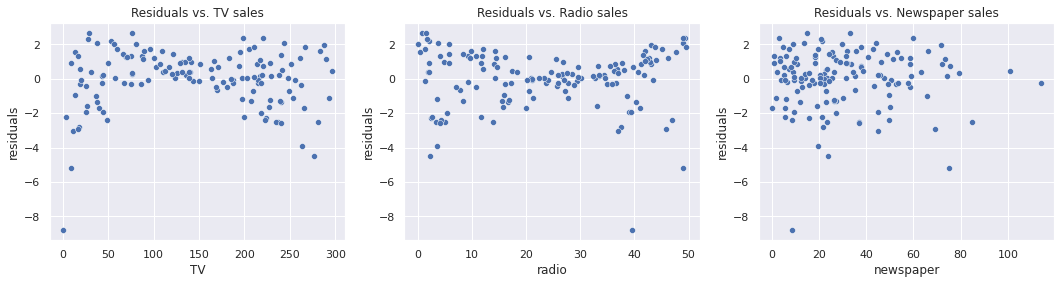

In [ ]:
# 4.4

fig = plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x=train['TV'], y=multi_residual);
plt.title('Residuals vs. TV sales')
plt.xlabel('TV')
plt.ylabel('residuals')

plt.subplot(1,3,2)
sns.scatterplot(data=train, x=train['radio'], y=multi_residual);
plt.title('Residuals vs. Radio sales')
plt.xlabel('radio')
plt.ylabel('residuals')

plt.subplot(1,3,3)
sns.scatterplot(data=train, x=train['newspaper'], y=multi_residual);
plt.title('Residuals vs. Newspaper sales')
plt.xlabel('newspaper')
plt.ylabel('residuals')

plt.show()

#comments: Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to each of the three features?
# residuals on newspaper appear to cluster in the lower values units of newspaper, and more scattered in the higher values units

### 5. Linear regression with interaction terms

Our multiple linear regression includes additive effects of all three
types of advertising media. However, it does not include *interaction*
effects, in which combining different types of advertising media
together results in a bigger boost in sales than just the additive
effect of the individual media. The pattern in the residuals plots from
parts (1) through (4) suggest that a model including an interaction
effect may explain sales data better than a model including additive
effects. Add four columns to your data frame:

-   `newspaper` $\times$ `radio`
-   `TV` $\times$ `radio`
-   `newspaper` $\times$ `TV`
-   `newspaper` $\times$ `radio` $\times$ `TV`

Then, train a linear regression model on all seven features: the three
types of ad budgets, and the four interaction effects. Repeat the
analysis of part (4) for the model including interaction effects.
Comment on the results. Are the interaction effects helpful for
explaining the effect of ads on product sales? Are there any patterns
evident in the residual plots that suggest further opportunities for
improving the model?

(If you think the results suggest further opportunities for improving
the model, you are welcome to try and to comment on the results!)

**The code in this section is not provided for you**. You will need to
write code, in addition to the text cells in which you write your
comments, observations, and answers to the questions.

In [ ]:
# create interaction effects

train2 = train.copy()
# train2['newspaper_radio'] = pd.Series(train['newspaper'] * train['radio'], name='newspaper_radio')
# x_t = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(x)
train2['newspaper_radio'] = train2['newspaper'] * train2['radio']
train2['TV_radio'] = train2['TV'] * train2['radio']
train2['newspaper_TV'] = train2['newspaper'] * train2['TV']
train2['newspaper_radio_TV'] = train2['newspaper'] * train2['radio'] * train2['TV']
train2

,TV,radio,newspaper,sales,newspaper_radio,TV_radio,newspaper_TV,newspaper_radio_TV
164,163.5,36.8,7.4,18.0,272.32,6016.80,1209.90,44524.320
39,43.1,26.7,35.1,10.1,937.17,1150.77,1512.81,40392.027
28,240.1,16.7,22.9,15.9,382.43,4009.67,5498.29,91821.443
123,224.0,2.4,15.6,11.6,37.44,537.60,3494.40,8386.560
155,187.8,21.1,9.5,15.6,200.45,3962.58,1784.10,37644.510
...,...,...,...,...,...,...,...,...
82,239.8,4.1,36.9,12.3,151.29,983.18,8848.62,36279.342
68,139.3,14.5,10.2,13.4,147.90,2019.85,1420.86,20602.470
60,210.7,29.5,9.3,18.4,274.35,6215.65,1959.51,57805.545
87,76.3,27.5,16.0,12.0,440.00,2098.25,1220.80,33572.000


In [ ]:
# multiple linear regression model for 7 features

reg_multi2 = LinearRegression().fit(train2[['TV', 'radio', 'newspaper', 'newspaper_radio',	'TV_radio',	'newspaper_TV',	'newspaper_radio_TV']], train2['sales'])

In [ ]:
# Coefficient and Interception

print("Coefficients (TV, radio, newspaper, newspaper_radio,	TV_radio,	newspaper_TV, newspaper_radio_TV):\n", reg_multi2.coef_)
print("Intercept: ", reg_multi2.intercept_)

Coefficients (TV, radio, newspaper, newspaper_radio,	TV_radio,	newspaper_TV, newspaper_radio_TV):
 [ 2.38973447e-02  3.66715551e-02  3.02069130e-02 -4.18394684e-04
  1.03023364e-03 -1.79288346e-04  2.47653757e-06]
Intercept:  6.007895269461988


In [ ]:
# R2 and MSE for multiple linear regression

y_pred_tr_multi2 = reg_multi2.predict(train2[['TV', 'radio', 'newspaper', 'newspaper_radio',	'TV_radio',	'newspaper_TV',	'newspaper_radio_TV']])

r2_tr_multi2  = metrics.r2_score(train2['sales'], y_pred_tr_multi2)
mse_tr_multi2 = metrics.mean_squared_error(train2['sales'], y_pred_tr_multi2)

print("Multiple regression R2:  ", r2_tr_multi2)
print("Multiple regression MSE: ", mse_tr_multi2)


# Multiple regression R2:   0.9018262100622871
# Multiple regression MSE:  2.885891634586171

Multiple regression R2:   0.9697632866569765
Multiple regression MSE:  0.8793677160173828


Text(0.5, 1.0, 'Predicted sales vs. Actual Sales')

Text(0.5, 0, 'actual values')

Text(0, 0.5, 'predicted values')

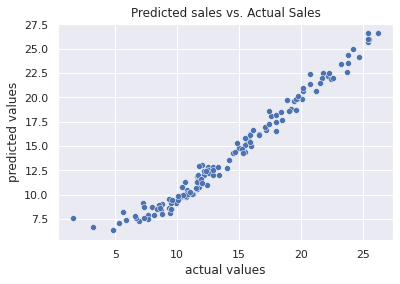

In [ ]:
# Replicate 4.1

sns.scatterplot(data=train2, x=train['sales'], y=y_pred_tr_multi2)
plt.title('Predicted sales vs. Actual Sales')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

#comments: What would you expect this plot to look like for a model that explains the data well?
# If the model predicts really well, we should be expecting a very clear diagonal line from (0,0) to (max(x_axis), max(y_axis))
# this model shows a linear relationship between the two variables, and almost a very clear diagonal line, but with a little tilted from the lower values units

In [ ]:
# Replicate 4.2

multi_residual2 = train2['sales'] - y_pred_tr_multi2
print("mean of residual: ", sts.mean(multi_residual2))

#comments:  What is the mean of the residuals? #see print
#What should be the mean of the residuals for a fitted linear regression model?
# the best scenario is that the mean of residual equals 0 or very close to 0, that means there are no residuals, and the model fits very well
# this residual shows the model is well fitted

mean of residual:  1.3259234979809013e-15


Text(0.5, 1.0, 'Residuals vs. Sales')

Text(0.5, 0, 'sales')

Text(0, 0.5, 'residuals')

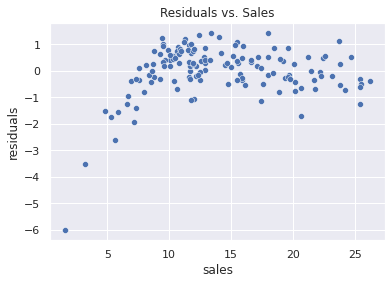

In [ ]:
# Replicate 4.3

sns.scatterplot(data=train2, x=train2['sales'], y=multi_residual2)
plt.title('Residuals vs. Sales')
plt.xlabel('sales')
plt.ylabel('residuals')
plt.show()

#comments: Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to actual sales?
# it seems that the model predicts well in ther lower values compare to the higher values in sales
# among 10-20 units of sales, cluster the largest amount of residuals

Text(0.5, 1.0, 'Residuals vs. TV sales')

Text(0.5, 0, 'TV')

Text(0, 0.5, 'residuals')

Text(0.5, 1.0, 'Residuals vs. Radio sales')

Text(0.5, 0, 'radio')

Text(0, 0.5, 'residuals')

Text(0.5, 1.0, 'Residuals vs. Newspaper sales')

Text(0.5, 0, 'newspaper')

Text(0, 0.5, 'residuals')

Text(0.5, 1.0, 'Residuals vs. newspaper_radio')

Text(0.5, 0, 'newspaper_radio')

Text(0, 0.5, 'residuals')

Text(0.5, 1.0, 'Residuals vs. TV_radio')

Text(0.5, 0, 'TV_radio')

Text(0, 0.5, 'residuals')

Text(0.5, 1.0, 'Residuals vs. newspaper_TV')

Text(0.5, 0, 'newspaper_TV')

Text(0, 0.5, 'residuals')

Text(0.5, 1.0, 'Residuals vs. newspaper_radio_TV')

Text(0.5, 0, 'newspaper_radio_TV')

Text(0, 0.5, 'residuals')

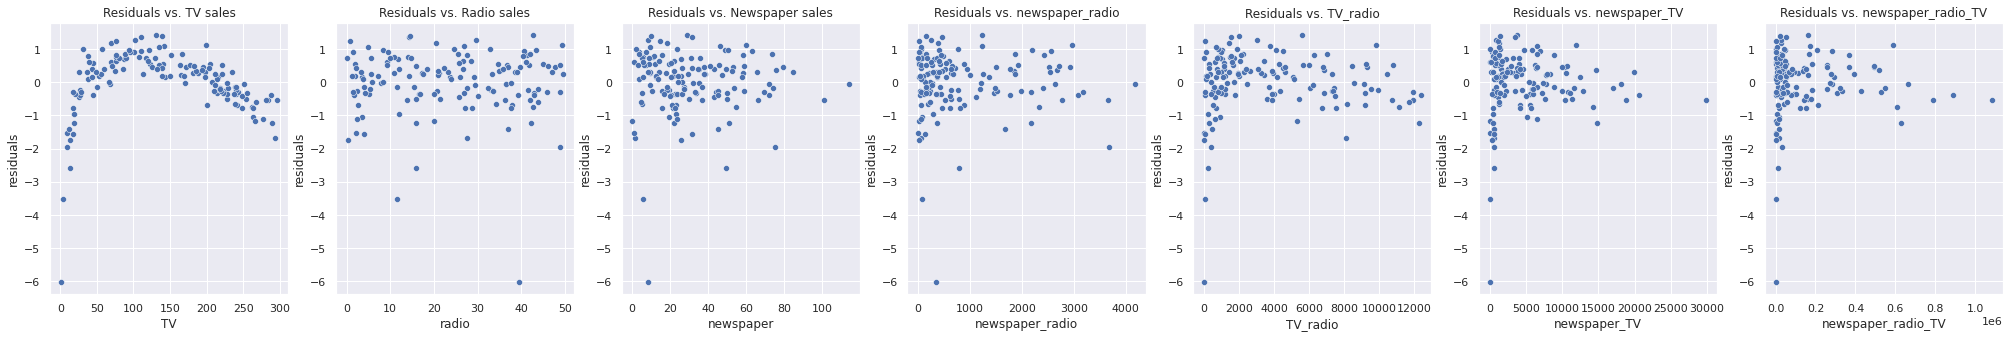

In [ ]:
# Replicate 4.4

fig = plt.figure(figsize=(35,5))

plt.subplot(1,7,1)
sns.scatterplot(data=train2, x=train2['TV'], y=multi_residual2);
plt.title('Residuals vs. TV sales')
plt.xlabel('TV')
plt.ylabel('residuals')

plt.subplot(1,7,2)
sns.scatterplot(data=train2, x=train2['radio'], y=multi_residual2);
plt.title('Residuals vs. Radio sales')
plt.xlabel('radio')
plt.ylabel('residuals')

plt.subplot(1,7,3)
sns.scatterplot(data=train2, x=train2['newspaper'], y=multi_residual2);
plt.title('Residuals vs. Newspaper sales')
plt.xlabel('newspaper')
plt.ylabel('residuals')

plt.subplot(1,7,4)
sns.scatterplot(data=train2, x=train2['newspaper_radio'], y=multi_residual2);
plt.title('Residuals vs. newspaper_radio')
plt.xlabel('newspaper_radio')
plt.ylabel('residuals')

plt.subplot(1,7,5)
sns.scatterplot(data=train2, x=train2['TV_radio'], y=multi_residual2);
plt.title('Residuals vs. TV_radio')
plt.xlabel('TV_radio')
plt.ylabel('residuals')

plt.subplot(1,7,6)
sns.scatterplot(data=train2, x=train2['newspaper_TV'], y=multi_residual2);
plt.title('Residuals vs. newspaper_TV')
plt.xlabel('newspaper_TV')
plt.ylabel('residuals')

plt.subplot(1,7,7)
sns.scatterplot(data=train2, x=train2['newspaper_radio_TV'], y=multi_residual2);
plt.title('Residuals vs. newspaper_radio_TV')
plt.xlabel('newspaper_radio_TV')
plt.ylabel('residuals')

plt.show()

#comments: Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to each of the three features?